# Introduction to the exploration of epidemiological models using EMULSION



| Author: **Sébastien Picault, INRAE** | June 2-4, 2021 |
|---|---|
| License: [CC-BY-NC-SA](https://en.wikipedia.org/wiki/Creative_Commons_license) | ![CC-BY-NC-SA](https://upload.wikimedia.org/wikipedia/commons/1/12/Cc-by-nc-sa_icon.svg "License CC-BY-NC-SA") |






## Exercise 1 — Your first EMULSION model

File [`exercises/step1.yaml`](exercises/step1.yaml) describes EMULSION components of a discrete-time, stochastic, compartment-based SIR model.

### 1.1 Dive into the model

Open the file in a text editor and look at the different parts. Identify where states and transitions, initial conditions, and parameters are defined.

### 1.2 Run the model

Run the model with EMULSION and look at simulation outcomes. To do so, open a terminal in the `exercises` directory and type what follows:
    
```
emulsion run --plot step1.yaml
```


In [1]:
%%bash 
cd exercises
emulsion run --plot step1.yaml

Simulation level:herd
Simulation finished in 2.69 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR.html


[Run 0]: 100%|██████████| 100/100
[Run 1]: 100%|██████████| 100/100
[Run 2]: 100%|██████████| 100/100
[Run 3]: 100%|██████████| 100/100
[Run 4]: 100%|██████████| 100/100
[Run 5]: 100%|██████████| 100/100
[Run 6]: 100%|██████████| 100/100
[Run 7]: 100%|██████████| 100/100
[Run 8]: 100%|██████████| 100/100
[Run 9]: 100%|██████████| 100/100


Plots corresponding to simulation outcomes are produced in a file named after the `model_name` value specified in the YAML file: [img/stoch_compart_SIR.html](exercises/img/stoch_compart_SIR.html). 

They are built from the simulation outputs which are stored in a CSV file named `counts.csv`, which by default is located in the `outputs/` directory: [outputs/counts.csv](exercises/outputs/counts.csv)

**NOTE:** Running `emulsion -h` provides all possible commands and options (see main ones in file [`appendix.pdf`](appendix.pdf)). Also, in the terminal, the command comes with completion (start typing and hit TAB key to view proposals).

In [2]:
%%bash
emulsion -h

Usage:
    emulsion run [--plot] MODEL [options] [(-p KEY=VALUE)...]
    emulsion show MODEL [options] [(-p KEY=VALUE)...]
    emulsion describe MODEL PARAM...
    emulsion diagrams MODEL [options]
    emulsion plot MODEL [options]
    emulsion check MODEL [options]
    emulsion generate MODEL
    emulsion (-h | --help | -V | --version | -L | --license)

Commands:
  run MODEL                   Run simulations based on the specified MODEL
                              (MODEL is the path to the YAML file describing the
                              model to run).
  show MODEL                  Print all MODEL parameter values and exit.
  describe MODEL PARAM...     Describe the role of specified PARAMeters in the
                              MODEL and exit.
  diagrams MODEL              Produce model diagrams (as option --view-model
                              when running/plotting) and open them
  plot MODEL                  Plot outputs for MODEL (assumed already run) and
           

### 1.3 View model diagrams 

Produce a graphical representation of the state machines of the model:

```
emulsion diagrams step1.yaml
```

then look at the results here: [img/stoch_compart_SIR_health_state_machine.svg](exercises/img/stoch_compart_SIR_health_state_machine.svg).    

![stoch_compart_SIR_health_state_machine.svg](exercises/img/stoch_compart_SIR_health_state_machine.svg)

In [3]:
%%bash
cd exercises
emulsion diagrams step1.yaml

Simulation level:herd
Generated state machine diagram img/stoch_compart_SIR_health_state_machine.svg


 * These diagrams are produced automatically from the model using Graphviz and the "dot" format. The corresponding figures are in the `img/` directory, named after the model and each state machine, for instance [stoch_compart_SIR_health_state_machine.svg](exercises/img/stoch_compart_SIR_health_state_machine.svg). By default, they are produced in SVG format; alternatively (with option `--format`), they can be produced in PDF or PNG formats.
    
 * The "dot" files are in `outputs/` and can be customized for further use: [stoch_compart_SIR_health_state.dot](exercises/outputs/stoch_compart_SIR_health_state.dot)
    

### 1.4 Parenthesis: Integrate simulation results with R

The default plots produced by EMULSION are not meant to be used but for immediate feedback during model prototyping. Otherwise, the simulation results can be processed with your favourite statistics tool. In what follows, we will provide examples based on [R](https://www.r-project.org/) with libraires [tidyverse](https://www.tidyverse.org/).

In [4]:
%load_ext rpy2.ipython

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



`summarise()` has grouped output by 'step'. You can override using the `.groups` argument.


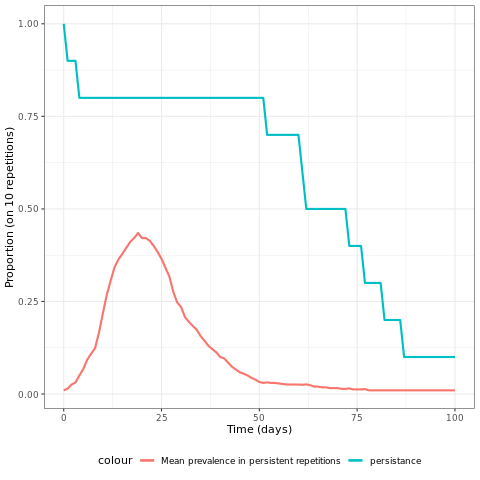

In [5]:
%%R
library(tidyverse)
results <- read.table("~/exercises/outputs/counts.csv", sep=",", header=TRUE)
## names(results)
## [1] "simu_id"               "S"                     "I"                    
## [4] "R"                     "J"                     "A"                    
## [7] "step"                  "level"                 "agent_id"             
##[10] "percentage_prevalence" "total_herd"           

## compute a persistence curve
NB.RUNS = max(results$simu_id) + 1 
results %>% 
    select(simu_id, step, I, total_herd) %>% 
    mutate(persists=(I > 0)) %>% 
    group_by(step) %>% 
    summarise(persistance=sum(persists)/NB.RUNS, prevalence=sum(I)/(total_herd * sum(persists))) %>%
    ggplot() + 
        geom_line(aes(x=step, y=persistance, colour="persistance"), size=1) + 
        geom_line(aes(x=step, y=prevalence, colour="Mean prevalence in persistent repetitions"), size=1) +
        theme_bw() + xlab("Time (days)") + ylab(paste("Proportion (on", NB.RUNS, "repetitions)")) + theme(legend.position = "bottom")

### 1.5 Change simulation conditions

Play with the model through the command-line interface: for instance, to run only one repetition (`-r 1`) but observe the evolution of the system in the long run (500 days: `-t 500`) with different parameter values (`-p` to change parameter value):

```
emulsion run --plot step1.yaml -r 1 -t 500 -p transmission_I=0.2 -p initial_prevalence=0.1
 ```
 

In [6]:
%%bash
cd exercises
emulsion run --plot step1.yaml -r 1 -t 500 -p transmission_I=0.2 -p initial_prevalence=0.1

Simulation level:herd
Simulation finished in 1.22 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR.html


[Run 0]: 100%|██████████| 500/500


---

## Exercise 2 — Introduce demography and age structure

Open file [`step2.yaml`](exercises/step2.yaml) and incorporate the following changes:

### 2.1 Add age groups

We will represent two age groups: **juveniles** (J) and **adults** (A), juveniles becoming adults at rate *maturation=0.05*. We will take example on existing parameters, processes and state machines:

- rename the model from `stoch_compart_SIR` to `stoch_compart_SIR_JA`
- add a process at animals level, named `age_group`

        processes:
          animals:
            - health_state
            - age_group   


- add a state machine `age_group`, with two states (J and A), and a transition between J and A 

        state_machines:
           ...
           age_group:
           desc: '...'
           states:
             - J:
                 name: 'Juveniles'
                 desc: '...'
                 fillcolor: 'purple'
             - A:
                 name: 'Adults'
                 desc: 'a...'
                 fillcolor: 'darkred'
           transitions:
             - from: J
               to: A
               rate: 'maturation'
               desc: 'maturation of juvenile individuals into adults'


- add the parameter `maturation`

        parameters:
          ...
          maturation: 
            desc: 'maturation rate, i.e. speed at which juveniles become adults'
            value: 0.05      


### 2.2 Run the model and observe the results. 
    
```
emulsion run --plot step2.yaml --silent
```

In [7]:
%%bash
cd exercises 
emulsion run --plot step2.yaml --silent

Simulation level:herd
Simulation finished in 4.05 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR_JA.html


100%|██████████| 10/10


... and check the results: [img/stoch_compart_SIR_JA.html](exercises/img/stoch_compart_SIR_JA.html)

**IMPORTANT NOTE:** 

Initial individuals are **distributed randomly** in J and A states. This is because the prototypes used for defining the initial conditions do not specify the value of `age_group`.

Let's assume that juveniles should be regarded as the default `age_group` state. 
- modify the initial prototypes to assign a "default" age group:

        prototypes:
          animals:
            - healthy:
                desc: 'healthy animals'
                health_state: S
                age_group: default
            - infectious:
                desc: 'infectious animals'
                health_state: I
                age_group: default
        

- modify state J in the state machines section to mark it as the default age group state:

        state_machines:
        ...
          age_group:
            states:
                 - J:
                     name: 'Juveniles'
                     desc: '...'
                     fillcolor: 'purple'
                     default: yes
            ...



### 2.3 Add a density-dependent mortality

Mortality is represented with a new state "Deceased" (D) in state machine `age_group`. It produces a "sink" to put individuals leaving the system.

Add state D **with property `autoremove: yes`** and transitions from both J and A to D with mortality rate `mu * total_herd / K`. 
- variable `total_herd` represents the total number of animals, automatically defined in EMULSION
- add two new parameters: the base mortality rate *mu = 0.05* and the carrying capacity of the environment *K = 150*


### 2.4 Add a birth dynamics

State machines can define a `productions:` section (similar to `transitions:`) to specify from and to which states and at which rate new individuals are produced.

- create a new prototype `newborn` for new individuals, specifying their `age_group` (J) but also their `health_state` (S, assuming no vertical transmission)
- add a production link between A and J (adults produce juveniles) at birth rate *b = mu* $\times\ 2$, specifying `prototype: newborn` for the newly created individuals

### 2.5 Test your final model

```
emulsion run --plot step2.yaml --silent
```


In [8]:
%%bash
cd exercises 
emulsion run --plot step2.yaml --silent

Simulation level:herd
Simulation finished in 4.28 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR_JA.html


100%|██████████| 10/10


... and check the results: [img/stoch_compart_SIR_JA.html](exercises/img/stoch_compart_SIR_JA.html)

### 2.6 Check the new diagram

You can visualize the diagram corresponding to the new state machine:

```
emulsion diagrams step2.yaml
```

![img/stoch_compart_SIR_JA_age_group_machine.svg](exercises/img/stoch_compart_SIR_JA_age_group_machine.svg)

**PLEASE NOTE:**
- the *autoremove* state (D) with dotted box
- the *production link* from A to J, with dashed arrow

In [9]:
%%bash
cd exercises
emulsion diagrams step2.yaml

Simulation level:herd
Generated state machine diagram img/stoch_compart_SIR_JA_health_state_machine.svg
Generated state machine diagram img/stoch_compart_SIR_JA_age_group_machine.svg


---

## Exercise 3 — Transformation into an Individual-Based Model (IBM)

Compartmental models are simple and able to cope with large amounts of individuals, but those individuals are not simulated explicitly: the total population is split into sub-populations associated with quantities. IBM provide a finer-grained approach where individuals features can be modelled explicitly.

EMULSION provides facilities for transforming compartmental models into IBM.
- open file [`step3.yaml`](exercises/step3.yaml)
- change the model name into `stoch_IBM_SIR_JA`
- in the `levels:` section, change the aggregation type from `compartment` to `IBM`
- just try (quite easy, isn't it?)
```
emulsion run --plot step3.yaml --silent
```


In [10]:
%%bash
cd exercises
emulsion run --plot step3.yaml --silent

Simulation level:herd
Simulation finished in 23.13 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_IBM_SIR_JA.html


100%|██████████| 10/10


Note the execution time — slow, isn’t it ?...

## Exercise 4 — Hybrid models

Programming issues aside, the major drawback of IBM is often execution time. EMULSION provides an automatic way of grouping individuals to reduce computation time. Such *hybrid models* are specified through keyword `aggregation_type: 'hybrid'` in the levels section. They use all IBM features, except for groupings and processes.

- open [step4.yaml](exercises/step4.yaml) and change the model name into `stoch_hybrid_SIR_JA`
- in the `levels:` section, change the aggregation type from `IBM` to `hybrid`
- add the following section:

        grouping:
          herd:
            infection: [health_state]
            aging: [age_group]
            
- and modify the `processes:` section as follows:

        processes:
          animals:            
            - health_state: infection   # state machine associated with a grouping
            - age_group: aging                    

- finally test the model:
````
emulsion run --plot step4.yaml --silent
````


In [11]:
%%bash
cd exercises
emulsion run --plot step4.yaml --silent

Simulation level:herd
Simulation finished in 16.29 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_hybrid_SIR_JA.html


100%|██████████| 10/10


and check the results: [img/stoch_hybrid_SIR_JA.html](exercises/img/stoch_hybrid_SIR_JA.html)

Note the execution time — much better, isn’t it ?

## Exercise 5 — Non-exponential durations

In most models, the durations in each state are assumed to follow exponential distributions. EMULSION allows to specify non-exponential durations in compartmental, IBM and hybrid models by adding a property `duration: value` to a state description. This value has to be defined in the `parameters:` section, either as a constant or as an expression, including the sampling in a statistical distribution.

When individuals (even "virtual" as in compartmental models) enter a state endowed with a `duration` property, they take a value (either constant or drawn in a distribution) and will not be allowed to leave the state before the end of this duration — unless they have a transition marked with an `escape` condition.

To illustrate that, here we want to replace the duration in the juvenile state (J), which is by defaut an exponential distribution of average $1/maturation$, by a constant duration `dur_juvenile` equal to $1/maturation$.

- open file [`step5.yaml`](exercises/step5.yaml) and rename the model as `stoch_compart_SIR_JA_dur`
- in the definition of state J, add the following property: `duration: dur_juvenile`, then define parameter `dur_juvenile` accordingly
- then, you have to **change the transition** from J to A by replacing `rate: maturation` by `proba: 1` — this means that any individual that has spent the correct duration in J is allowed to move to A, but not before
- finally, we do not want individuals waiting in the J state to be preserved from mortality! we thus have to allow the transition from J to D to be active during the duration in J: i.e. mark this transition with the property `escape: yes`
- try the model and see how juveniles, still subject to mortality, suddenly move to adults
```
emulsion run --plot step5.yaml --silent
```

In [ ]:
%%bash
cd exercises
emulsion run --plot step5.yaml --silent

Look at the results here: [img/stoch_compart_SIR_JA_dur.html](exercises/img/stoch_compart_SIR_JA_dur.html)

Also, note the nice clock attached to specific durations in model diagram!
```
emulsion diagrams step5.yaml
```

![img/stoch_compart_SIR_JA_dur_age_group_machine.svg](exercises/img/stoch_compart_SIR_JA_dur_age_group_machine.svg)

In [2]:
%%bash
cd exercises
emulsion diagrams step5.yaml

Simulation level:herd
Generated state machine diagram img/stoch_compart_SIR_JA_dur_health_state_machine.svg
Generated state machine diagram img/stoch_compart_SIR_JA_dur_age_group_machine.svg


## Exercise 6 — Adding a contact structure

Now, we assume that juveniles and adults are physically separated, which affects the transmission of the pathogen. We have indeed to introduce different transmission rates within and between groups. 

In what follows, we denote by `transAJ` the transmission rate from group A to group J. Thus, group J (resp. A) is experiencing a force of infection defined by:
$$
f_J = \frac{trans_{JJ} * I_J + trans_{AJ} * I_A}{N_J} \qquad f_A = \frac{trans_{AA} * I_A + trans_{JA} * I_J}{N_A}
$$ 

where $I_J$ (resp. $I_A$) denotes the number of infectious individuals in group J (resp. A) and $N_J$ (resp. $N_A$) the total number of individuals in group J (resp. A).
